# Question 1

Import packages, load data and instantiate scaler and PCA

In [189]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

q1_data = pd.read_csv("PADL-Q1.csv")
scaler = StandardScaler()
pca = PCA(n_components=5)

Apply PCA to scaled data

In [190]:
q1_data_scaled = scaler.fit_transform(q1_data)
q1_pcs = pca.fit_transform(q1_data_scaled)

Check the minimum number of dimensions required to minimize loss of information

In [191]:
total_variance = sum(q1_pcs.var(axis=0))
for n_comp in range(1, q1_pcs.shape[1]):
    first_n_comp_variance = (
        sum(q1_pcs[:, 0:n_comp].var(axis=0)) / total_variance
    ) * 100
    print(
        f"The first {n_comp} principal components correspond to {first_n_comp_variance.round(2)}% of the total variance"
    )

The first 1 principal components correspond to 40.32% of the total variance
The first 2 principal components correspond to 70.24% of the total variance
The first 3 principal components correspond to 81.51% of the total variance
The first 4 principal components correspond to 91.95% of the total variance


Reducing the number of dimensions to four allows for a relatively small loss of information - the 4 components correspond to around 92 percent of the total variance.

In [192]:
pca_min_dims = PCA(n_components=4)
q1_pcs_min_dimensions = pca_min_dims.fit_transform(q1_data_scaled)
components = pca_min_dims.components_
components

array([[-0.55608777,  0.16605693, -0.55968369,  0.2074285 , -0.55400277],
       [-0.07616798, -0.68491569, -0.21946827, -0.67209755, -0.15876868],
       [-0.58290436,  0.2674771 , -0.13665832, -0.32308723,  0.68236182],
       [ 0.56104011,  0.48673801, -0.55197578, -0.37899935, -0.00152482]])

# Question 2

In [292]:
import pandas as pd

q2_data = pd.read_csv("PADL-Q2-train.csv")
q2_data.head()
q2_data_X, q2_data_y = q2_data.drop(columns=["out", "y"]), q2_data["out"]

In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    q2_data_X,
    q2_data_y,
    train_size=0.9,  # There is more unknown data to test on so we can use more for training
    random_state=303,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72, 3), (72,), (8, 3), (8,))

In [294]:
from sklearn.feature_selection import r_regression

r_regression(X_train, y_train)

array([-0.3598524 , -0.45770557,  0.42611551])

In [295]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter("ignore", category=ConvergenceWarning)
num_poly_features = [1, 2, 3, 4, 5]
regularisations = [
    RidgeCV(fit_intercept=True),
    LassoCV(fit_intercept=True),
    Ridge(fit_intercept=True),
    Lasso(fit_intercept=True),
    LinearRegression(fit_intercept=True),
    RidgeCV(fit_intercept=False),
    LassoCV(fit_intercept=False),
    Ridge(fit_intercept=False),
    Lasso(fit_intercept=False),
    LinearRegression(fit_intercept=False),
]
preprocessing = [MinMaxScaler(), StandardScaler(), Normalizer(), PCA(n_components=3)]
best_r2 = -100000
best_model = None
for degree in num_poly_features:
    for reg in regularisations:
        for proc in preprocessing:
            model = make_pipeline(proc, PolynomialFeatures(degree), reg)
            model.fit(X_train, y_train)
            current_r2 = r2_score(y_test, model.predict(X_test))
            if current_r2 > best_r2:
                best_r2 = current_r2
                best_model = model
            print(r2_score(y_test, model.predict(X_test)))

-0.7219295695540431
-0.7228610084406963
-0.03177341702877423
-0.840326660594799
-0.843274626707684
-0.8533318977650464
-0.7934615978124451
-0.8496961313325442
-0.7219295695540389
-0.8401907191921834
-0.03264473295358683
-0.8962040152533735
-0.032861269383324565
-0.032861269383324565
-0.032861269383324565
-0.045034145738546805
-0.8551904141849893
-0.85519041418499
-0.8192690482479554
-0.855190414185039
-0.6921123475852329
-0.735474970630716
-0.035136685311303095
-0.8404723621598278
-0.8242594022711378
-0.800148477812163
-0.3374869823606639
-0.8700464503154051
-0.6921123475852116
-0.8416780300253368
-0.03285485053067472
-0.8975423887699652
-0.07766392758136087
-0.07766392758136087
-0.07766392758136087
-0.10172246692993125
-0.8551904141849915
-0.8551904141849906
-0.8192690482478997
-0.8551904141850384
-1.371694934129128
-1.7252338922542645
-0.031988798140858865
-2.192721063852733
-2.056191512658155
-1.9834375022845974
-0.5095786380132798
-0.6366096744245913
-0.7652026513562591
-2.15543578

/Users/ivanbar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.25798e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


-1.2351252243152118
0.07271619958768549
-0.6329358585769147
-0.1895554689558412
-0.779165576938788
-11.684507275546641
-0.03193434169335019
-6.594621644975882
-0.07766392758136087
-0.07766392758136087
-0.07766392758136087
0.07143737243486514
-17.486507596645993
-17.43745358356303
-7.148456957719848
-17.474258984606518


/Users/ivanbar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.19386e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.3416312558578448


Pipeline(steps=[('pca', PCA(n_components=3)),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso())])

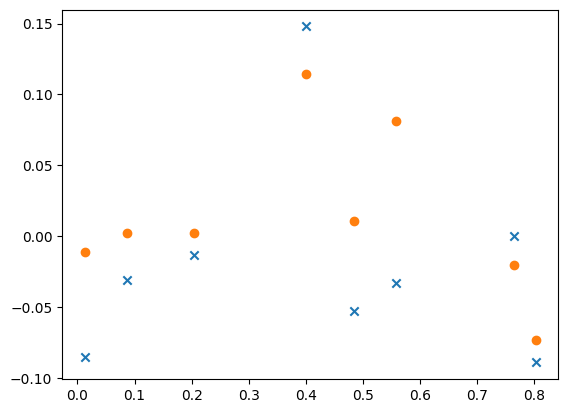

In [297]:
import matplotlib.pyplot as plt

print(best_r2)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
plt.scatter(X_test["z"], y_test, marker="x")
plt.scatter(X_test["z"], preds)
best_model

# Question 3

In [198]:
L = ["gold", "diamond", "robbery", "bank", "police"]

Capture all triplets matching the pattern 'X and Y'

In [199]:
import re

pattern = re.compile(
    r"(?=("  # We need a lookahead because triplets can overlap (e.g. 'X and Y and Z'), normal regex will not capture the second triplet
    r"(?<![a-zA-Z-])"  # Negative lookbehind, ensuring that each triplet starts at the beginning of the first word.
    r"[a-zA-z]+"  # At least one letter (so we don't capture triplets like ', and then')
    r"[\S]*"  # Any number of further letters and/or punctuation except whitespace
    r"\s+"  # At least one whitespace character (newline, tab, space, etc)
    r"[Aa]nd"  # 'And' or 'and'
    r"\s+"  # At least one whitespace character
    r"[a-zA-z]+"  # At least one letter
    r"[\S]*"  # Any number of further letters and/or punctuation
    r"))"
)
print(pattern.findall("testing and trialling"))  # Can capture a single triplet
print(pattern.findall("X and Y and Z"))  # Can capture overlapping triplets
print(pattern.findall("tight-fitting and sleek"))  # Can capture hyphenated words
print(pattern.findall("One And two"))  # Case-insensitive for and
print(
    pattern.findall("This is the end of one sentence. And so, another begins.")
)  # Can capture triplets across sentences
print(
    pattern.findall(
        """
This is the end of one sentence.
And the other is on a new line.
"""
    )
)  # Can handle line breaks
print(
    pattern.findall("What?! And you're only telling me now?")
)  # Can handle other punctuation

['testing and trialling']
['X and Y', 'Y and Z']
['tight-fitting and sleek']
['One And two']
['sentence. And so,']
['sentence.\nAnd the']
["What?! And you're"]


In [200]:
with open("sherlock.txt") as sherlock_file:
    sherlock_full_text = (
        sherlock_file.read()
    )  # full text needed to train the model later
    captured_triplets = pattern.findall(sherlock_full_text)
captured_triplets = [
    re.sub(re.compile(r"\s"), " ", triplet) for triplet in captured_triplets
]  # Replace whitespace (tabs, newlines, etc) characters with spaces

Create a convenience function to compare the length of the shared suffixes: start at the end of each word and iterate backwards until the first pair of letters does not match

In [201]:
def shared_suffix_length(word1: str, word2: str) -> int:
    suffix_length = 0
    for l1, l2 in zip(word1[::-1], word2[::-1]):
        if l1.lower() == l2.lower():
            suffix_length += 1
        else:
            return suffix_length
    return suffix_length


print(shared_suffix_length("bold", "gold"))
print(shared_suffix_length("lobster", "mobster"))
print(shared_suffix_length("apple", "potato"))

3
6
0


Find triplets where the last word rhymes with the target word

In [202]:
rhymes = {}
for word in L:
    rhymes[word] = [
        re.sub(
            "[.,-]", "", triplet
        ).lower()  # remove any punctuation and convert to lowercase for consistency
        for triplet in captured_triplets
        if shared_suffix_length(
            word,
            re.sub(r"\s+", " ", triplet).split(" ")[  # Remove any repeating whitespace
                2
            ],
        )
        >= 3
    ]

In [203]:
rhymes

{'gold': ['away and told', 'rapidly and told', 'indemnify and hold'],
 'diamond': [],
 'robbery': ['delicacy and every',
  'pay and very',
  'ten and every',
  'abbots and archery',
  'police and every',
  'air and scenery',
  'long and very',
  'armchair and cheery',
  'police and very'],
 'bank': ['do and frank', 'mercifully and thank'],
 'police': ['help and advice']}

Load up a pre-trained word2vec model

In [204]:
import nltk
from gensim import downloader as api
from gensim.models import Word2Vec

nltk.download("punkt")

# Load the glove-wiki-gigaword-100 pre-trained word2vec model
model = api.load("glove-wiki-gigaword-100")
sherlock_model = Word2Vec(sherlock_full_text, vector_size=100, min_count=1, epochs=30)
total_examples = sherlock_model.corpus_count
sherlock_model.build_vocab([list(model.key_to_index.keys())], update=True)
sherlock_model.wv.vectors_lockf = np.ones(len(sherlock_model.wv))
sherlock_model.wv.intersect_word2vec_format(
    "~/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz",
    binary=False,
    lockf=1.0,
)
sherlock_model.train(sherlock_full_text, total_examples=total_examples, epochs=30)

[nltk_data] Downloading package punkt to /Users/ivanbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(14730844, 17861220)

Create a utility function to give a 'similarity score' to a triplet

In [205]:
def similarity_score(triplet: str) -> float:
    first_word = triplet.split(" ")[0]
    last_word = triplet.split(" ")[2]
    return sherlock_model.wv.similarity(first_word, last_word)

In [206]:
for word, triplets in rhymes.items():
    top_5_similar_triplets = sorted(triplets, key=similarity_score, reverse=True)[0:5]
    print(f"The best 5 cockney rhymes for word '{word}' are: {top_5_similar_triplets}")

The best 5 cockney rhymes for word 'gold' are: ['away and told', 'rapidly and told', 'indemnify and hold']
The best 5 cockney rhymes for word 'diamond' are: []
The best 5 cockney rhymes for word 'robbery' are: ['long and very', 'ten and every', 'police and every', 'pay and very', 'police and very']
The best 5 cockney rhymes for word 'bank' are: ['do and frank', 'mercifully and thank']
The best 5 cockney rhymes for word 'police' are: ['help and advice']


# Question 4

In [207]:
import torch

NUMBER_RANGE = np.arange(-1000, 1000, 5)

In [208]:
X = torch.tensor(
    [(a, b) for b in NUMBER_RANGE for a in NUMBER_RANGE], dtype=torch.float32
)
y = torch.tensor(
    [a * b for b in NUMBER_RANGE for a in NUMBER_RANGE], dtype=torch.float32
).unsqueeze(1)

In [209]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1),
)
optim = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(
    optim, step_size=1000, gamma=0.1
)  # Blast through the first 1000 epochs, then go a bit more carefully
criterion = torch.nn.L1Loss()
epochs = 2000

In [210]:
for epoch in range(epochs):
    y_predict = model(X)
    loss = criterion(y, y_predict)
    optim.zero_grad()
    loss.backward()
    optim.step()
    scheduler.step()
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 250003.484375
epoch 1, loss 249814.90625
epoch 2, loss 248239.515625
epoch 3, loss 245588.125
epoch 4, loss 240724.921875
epoch 5, loss 232975.0
epoch 6, loss 221967.15625
epoch 7, loss 207359.03125
epoch 8, loss 189689.984375
epoch 9, loss 172112.40625
epoch 10, loss 154039.5
epoch 11, loss 129996.953125
epoch 12, loss 110192.28125
epoch 13, loss 98045.140625
epoch 14, loss 86965.5390625
epoch 15, loss 78193.46875
epoch 16, loss 86156.46875
epoch 17, loss 90103.7578125
epoch 18, loss 87367.875
epoch 19, loss 92381.28125
epoch 20, loss 91559.21875
epoch 21, loss 88266.1484375
epoch 22, loss 81854.5625
epoch 23, loss 72800.9453125
epoch 24, loss 67614.6484375
epoch 25, loss 63841.765625
epoch 26, loss 71689.40625
epoch 27, loss 69321.875
epoch 28, loss 66301.75
epoch 29, loss 65140.62109375
epoch 30, loss 65631.0234375
epoch 31, loss 66255.234375
epoch 32, loss 64598.17578125
epoch 33, loss 58989.1328125
epoch 34, loss 56334.5546875
epoch 35, loss 58041.515625
epoch 36, lo

KeyboardInterrupt: 

In [ ]:
test = torch.tensor([0, 0], dtype=torch.float32)
model(test)

# Question 5

In [271]:
from torch.utils.data import Dataset
import os
from torchvision.io import read_image
from pathlib import Path
from glob import glob


class ClocksDataset(Dataset):
    def __init__(self, data_dir: str, transform=None):
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(glob(f"{self.data_dir}/*.txt"))

    def __getitem__(self, item):
        img_path = os.path.join(self.data_dir, f"{str(item).zfill(4)}.png")
        label_path = os.path.join(self.data_dir, f"{str(item).zfill(4)}.txt")
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)
        label = Path(label_path).read_text()
        return image, label

Text(0.5, 1.0, '04:02')

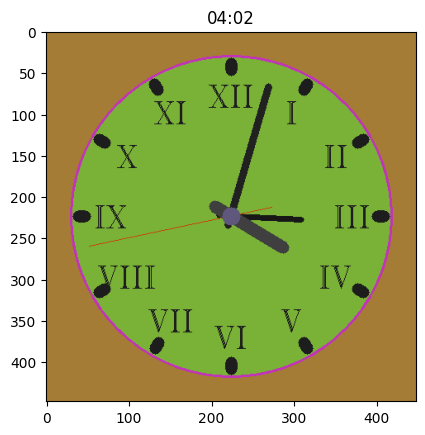

In [277]:
dataset = ClocksDataset("train")
img, label = dataset[0]

plt.imshow(img.permute(1, 2, 0))
plt.title(label)

# Question 6